# Interactive Map of U.S. Counties

## This map displays counties across the U.S. and via a user interaction (i.e. clicking), the respiratory death rate, air polution, and the correlation between the two across the past 15 years. Also, the predicted respiratory risk is also displayed.

### Brandon Pratt, 11/10/2019

## Import Python Libraries

In [5]:
import chart_studio
import json

import chart_studio.plotly as py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go

from ipywidgets import Output, VBox
from urllib.request import urlopen

## Load Geographical Data

### Structure of the dataframe is as follows:
#### column 1: five-digit Federal Information Processing Standards code which uniquely identified counties 
#### coulmn 2: the rate of something (i.e. the data)

In [3]:
# Load in county geographic data
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
    
# create pandas dataframe of specified data
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

FigureWidget({
    'data': [{'colorbar': {'title': {'text': '% unemployed'}},
              'colorscale': [[0.…

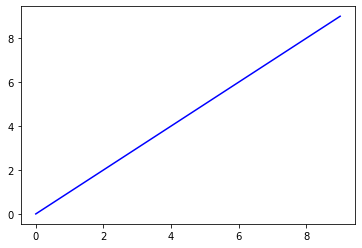

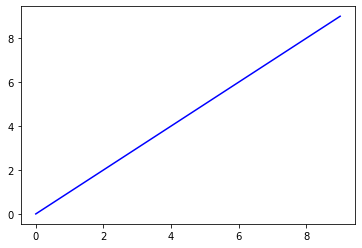

In [9]:
# figure widget way

f = go.FigureWidget([go.Choroplethmapbox(geojson=counties, locations=df.fips, z=df.unemp,colorscale="Viridis", zmin=0, zmax=12,
                                    marker_opacity=0.5, marker_line_width=0,colorbar_title="% unemployed")])
map=f.data[0]
from plotly.callbacks import Points, InputDeviceState
points, state = Points(), InputDeviceState()
    
def click_fn(trace, points, state):
    inds = points.point_inds
    # Do something
    #print('bye')
    plt.plot(np.arange(10),np.arange(10),color='Blue')
    
map.on_click(click_fn)

f
f.update_layout(mapbox_style="carto-positron",mapbox_zoom=3, mapbox_center = {"lat": 37.0902, "lon": -95.7129},
               title_text = 'Unemployment Rate', geo_scope='usa')

#url = py.plot(fig, filename="us_map", auto_open=False)...too big of a file for URL